# Simple linear Regression(SLR)

# Do to list:
1. Read the dataset
2. perform EDA and feature engineering 
3. divide our dataset into independent and dependent features
4. Further decide the dataset into train and test
5. Standard scalling on the train and test data
6. Model Training

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [2]:
# Read the data set: 
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
'''
Our goal is to find the best fit line through simple linear regression.
why SLR beacuse there is one deoendes and one independent feature is present.
'''
print('jsk')

jsk


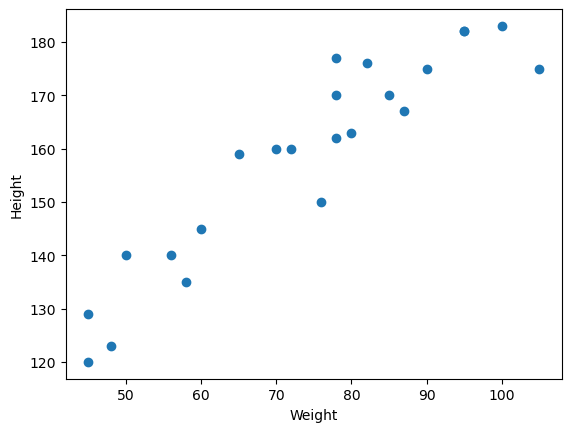

In [4]:
# ploting the scater plot on the data 
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [5]:
# looking the info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [7]:
# checking the missing values:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

# divide out dataset into independent and dependent features


In [8]:
x = df[['Weight']]          # independent features[ double braket becoz it will be colomn in the plot ]
y = df['Height']           # dependent features [single bracket becoz it will be seris in the plot ]

In [9]:
# shape of the data 
x.shape, y.shape

((23, 1), (23,))

# 4.Further decide the dataset into train and test

In [10]:
# importing the sklearn library to train and test the dataset
from sklearn.model_selection import train_test_split

In [11]:
# calling the train and test library.
x_train, x_test , y_train , y_test = train_test_split(x,y , test_size=0.20, random_state= 42)

In [12]:
# how much data present in traing and test dataset:
x_train.shape, x_test.shape

((18, 1), (5, 1))

In [13]:
# output of x_train and x_test dataset:
y_train.shape, y_test.shape

((18,), (5,))

# 5. Standard scalling on the train and test data

why we using standard scalling because our Aim is to make fastly optimise the convergence algoritham so that he reach the global minima as soon as possible.

In [14]:
# importing the standard scaller form the sk learn 
from sklearn.preprocessing import StandardScaler

In [15]:
# making the obeject of standardscaler:
scaler = StandardScaler()

In [16]:
# applying standard scalling on x-train data set:
x_train = scaler.fit_transform(x_train)

In [17]:
x_train             # scalled values

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [18]:
# applying standard scalling on x-test dataset:
x_test = scaler.transform(x_test)

In [19]:
x_test   # scalled values for x-test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

**# Note:** we only apply standard scalling on x variable this is our input  variable:
    we don't appy on y variable because that is output variable.

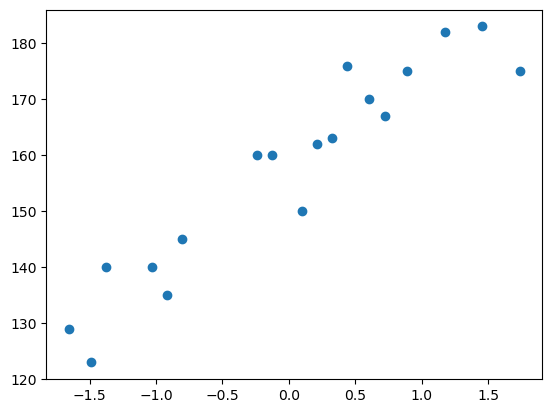

In [20]:
# scatter the x-train and y train after standard saclling:
plt.scatter(x_train, y_train)

In [21]:
# if case we want to add some other input variavle in the scalling then we should do:
scaler.transform([[18]])                  # these variable added 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-3.18168268]])

# 6. Model Training

In [22]:
# importing the linear regression from sklearn

from sklearn.linear_model import LinearRegression

In [23]:
# 6.1 creating the obj to inlisize the model
regressor = LinearRegression()

In [24]:
#6.2 training the trian dataset
regressor.fit(x_train, y_train)

LinearRegression()

In [25]:
# 6.3 intercept of regression model 
regressor.intercept_

157.5

In [26]:
# 6.4 coefficeint of slope of regression model 
regressor.coef_

array([17.03440872])

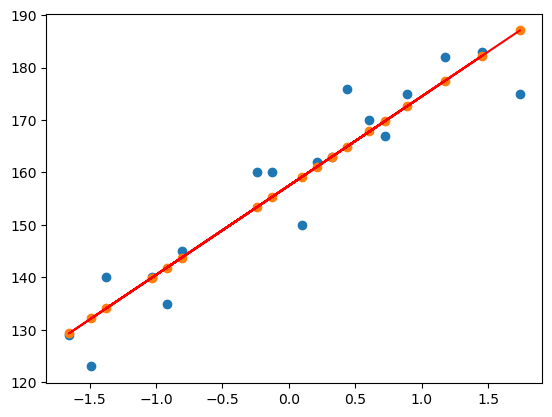

In [27]:
# 6.5 to see the best fit line in scater plot ;
plt.scatter(x_train ,y_train)

# for calling the best fit line
plt.scatter(x_train, regressor.predict(x_train))                 # for doted point

plt.plot(x_train, regressor.predict(x_train),'r')                        # for doted point with best fit line

# prediction of train data:
1. predicted height output = intercept + coef_(weight)
2. y_pred_train = 157.5 + 17.03 (x_train)

# prediction of test data 
1. predicted height output = intercept + coef_(weight)
2. y_pred_test = 157.5 + 17.03(x_test)

In [28]:
# 6.6. Prediction for the test data "
y_pred_test = regressor.predict(x_test)
y_pred_test              # y_predicted test data 

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [29]:
# original y_test data 
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

# 6.7 To checking the accuracy of the prediction we using performance matrix :
 Performance matrix = MSE,MAE,RMSE

In [30]:
# USING MSE it calculating the error in prediction and give us 
# importing the MSE ,MAE form sklearn 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


# 6.8 checking the accuracy of the model using R-squard and Ajusted r-squard

formula : 
    **R^2 = 1- SSR/SST**
    
- R^2 = accuracy of the model
- SSR = sum of square of residuals(slop)
- SST = total sum of square

In [32]:
# importing the r-square form sklearn 
from sklearn.metrics import r2_score

In [33]:
score = r2_score(y_test, y_pred_test)
score            # accuracy of the model

0.776986986042344

# Adjusted r- square 

formula : 
    
 **Adjusted R^2 = 1- [(1-R^2) * (n-1) / (n-k-1)]**
    
where: 
- R^2 = the r-square of the model 
 - n = the number of observations
  - k = the number of predictor variables 

In [34]:
# display adjusted r- squared 
1 - (1-score)* (len(y_test-1)/ (len(y_test)- x_test.shape[1]- 1))

0.6283116434039066

# In this simple linear regression we create two model 

- 1. scaler
- 2.regressor 